In [1]:
from functions import *

## Objective:

Cluster songs based on their lyrics

In [2]:
en_songs = pd.read_csv('data/en_songs.csv')

In [3]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(en_songs.lyrics).toarray()

## Elbow method

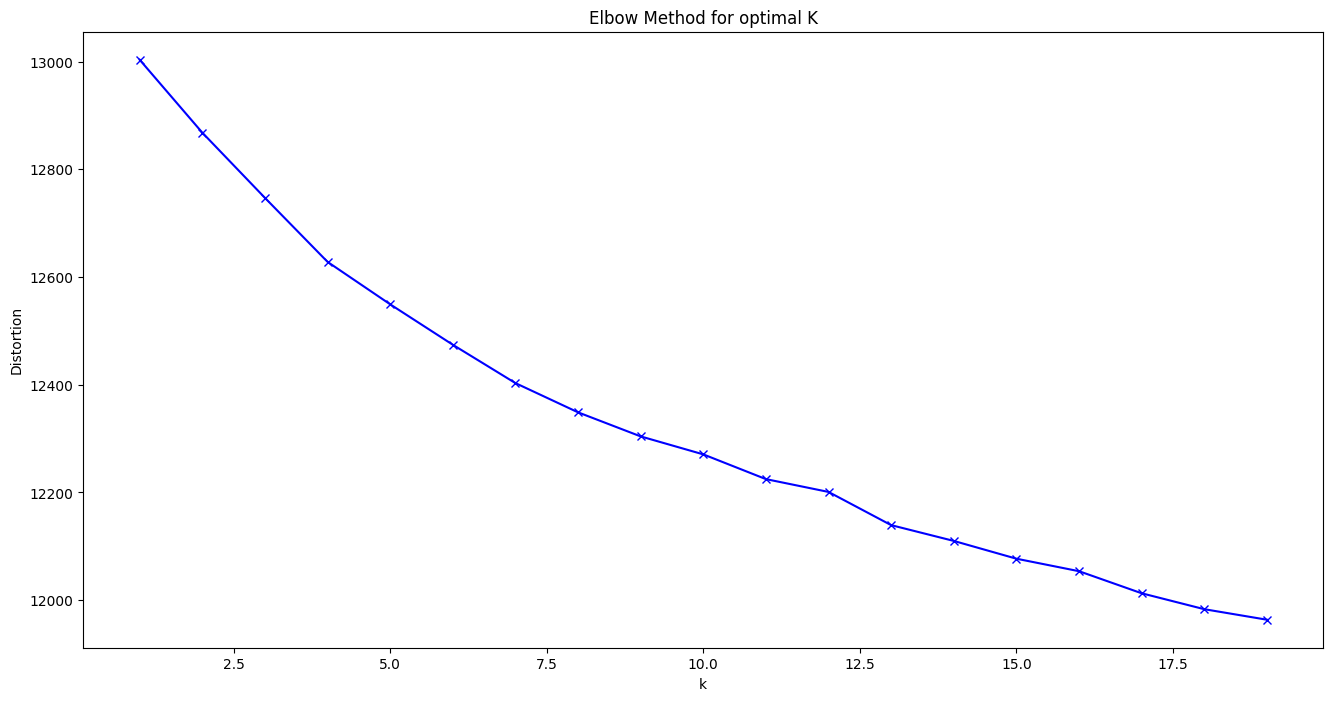

In [4]:
plot_elbow(X,1,20)

## Observation

Not sure where the elbow is at but we're gonna pick 20 because my intuition as a Data Scientist told me to.

In [5]:
true_k = 20
km = KMeans(n_clusters=true_k)
km.fit(X)

KMeans(n_clusters=20)

In [6]:
labels = km.labels_
songs_cl = pd.DataFrame(list(zip(en_songs.track_name, labels)), columns=['title','cluster'])
songs_cl.cluster.value_counts()

12    4222
14    2698
13    1268
15     780
3      650
5      525
10     488
18     451
7      352
9      328
2      328
0      299
16     278
11     244
8      207
1      189
4      143
19     115
17     104
6       54
Name: cluster, dtype: int64

In [7]:
songs_cl

,title,cluster
0,I Feel Alive,8
1,Poison,14
2,Baby It's Cold Outside (feat. Christina Aguilera),3
3,Dumb Litty,12
4,Soldier,16
...,...,...
13718,Sick Feeling,18
13719,Some Way,13
13720,Rising Like The Sun - Radio Mix,14
13721,Bound,15


In [8]:
en_songs['cluster_label'] = songs_cl['cluster']

In [9]:
en_songs2 = en_songs.copy()

In [10]:
en_songs2.to_csv('data/en_songs2.csv', index=False)